In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

<IPython.core.display.Javascript object>


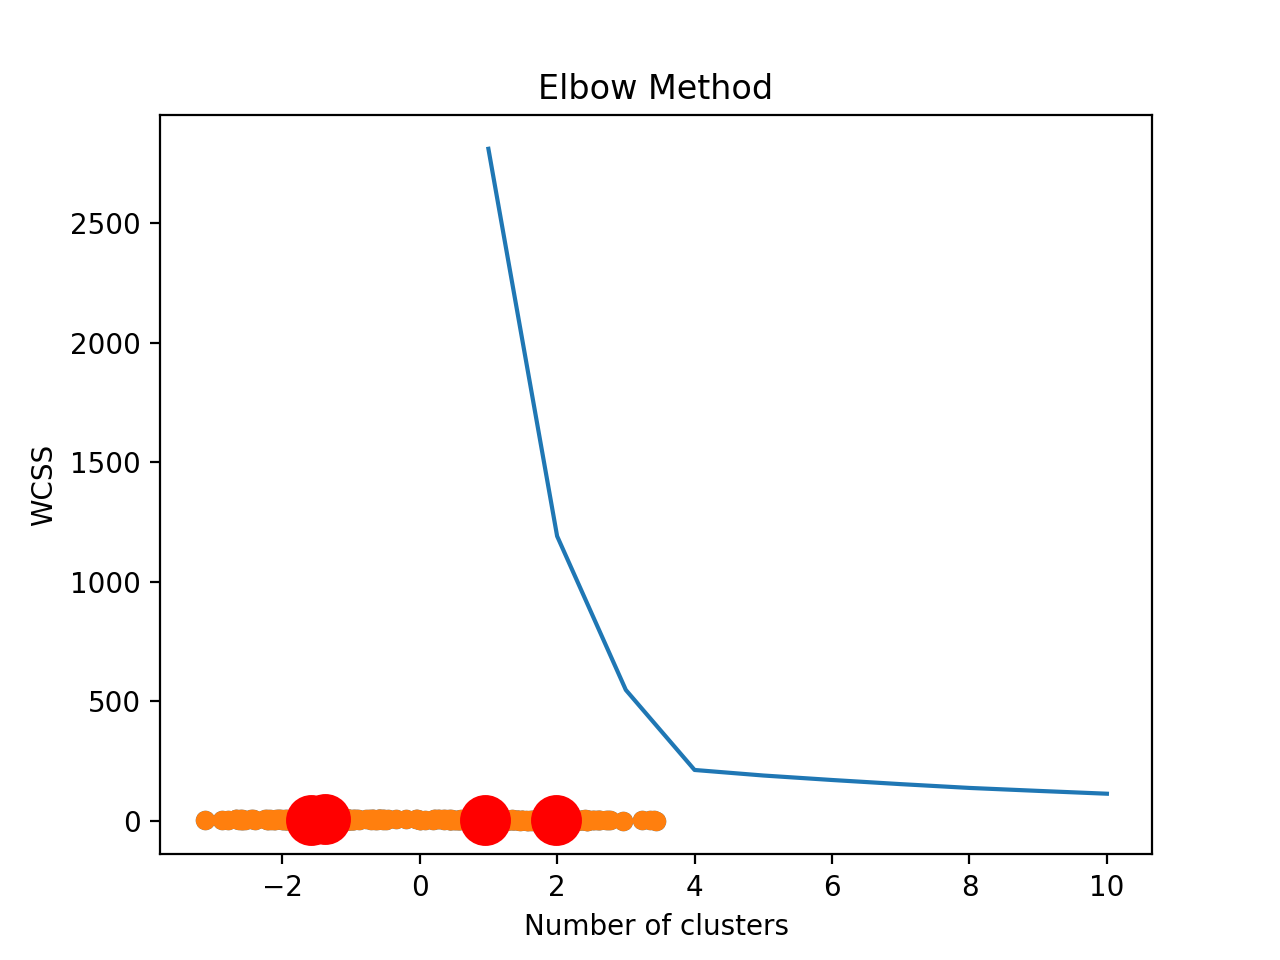

In [13]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [16]:
def load_dataset(name):
    return np.loadtxt(name)

In [17]:
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [18]:
def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']

    fig, ax = plt.subplots()

    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

    history_points = []
    for index, centroids in enumerate(history_centroids):
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.pause(0.8)


In [19]:
def kmeans(k, epsilon=0, distance='euclidian'):
    history_centroids = []
    if distance == 'euclidian':
        dist_method = euclidian
    dataset = load_dataset('durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    num_instances, num_features = dataset.shape
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    history_centroids.append(prototypes)
    prototypes_old = np.zeros(prototypes.shape)
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        prototypes_old = prototypes
        for index_instance, instance in enumerate(dataset):
            dist_vec = np.zeros((k, 1))
            for index_prototype, prototype in enumerate(prototypes):
                dist_vec[index_prototype] = dist_method(prototype,
                                                        instance)

            belongs_to[index_instance, 0] = np.argmin(dist_vec)

        tmp_prototypes = np.zeros((k, num_features))

        for index in range(len(prototypes)):
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            prototype = np.mean(dataset[instances_close], axis=0)
            # prototype = dataset[np.random.randint(0, num_instances, size=1)[0]]
            tmp_prototypes[index, :] = prototype

        prototypes = tmp_prototypes

        history_centroids.append(tmp_prototypes)

    # plot(dataset, history_centroids, belongs_to)

    return prototypes, history_centroids, belongs_to

In [20]:
#main file 
def execute():
    #load dataset
    dataset = load_dataset('durudataset.txt')
    #train the model on the data
    centroids, history_centroids, belongs_to = kmeans(2)
    #plot the results
    plot(dataset, history_centroids, belongs_to)

<IPython.core.display.Javascript object>


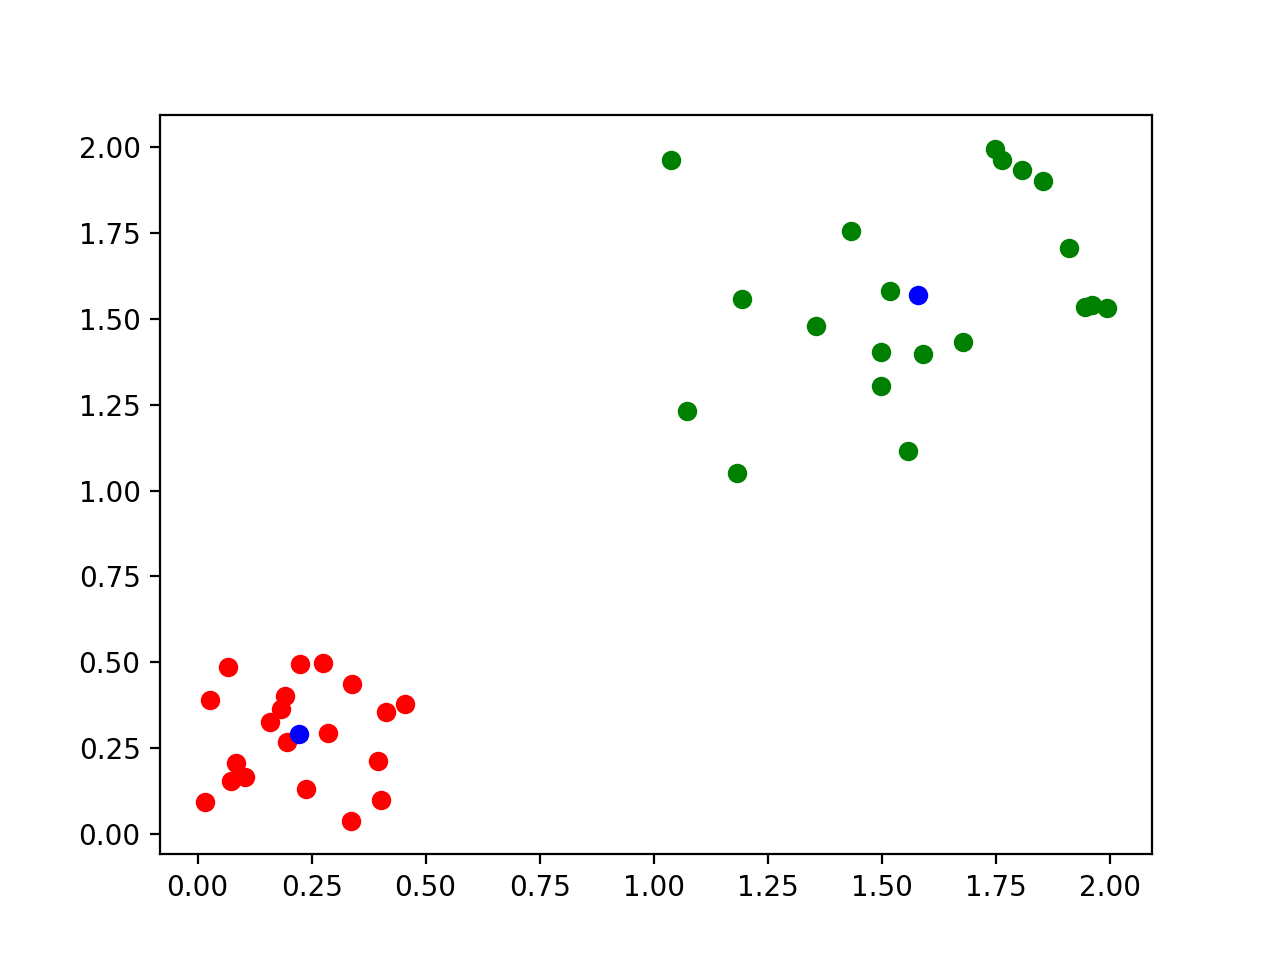

centroids 1 [0.22331067 0.28960446]
centroids 1 [1.58058247 1.56897412]
centroids 2 [0.22331067 0.28960446]
centroids 2 [1.58058247 1.56897412]
centroids 3 [0.22331067 0.28960446]
centroids 3 [1.58058247 1.56897412]


In [21]:
%matplotlib notebook

#do everything
execute()